In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\kowsi\\Downloads\\Hackathon\\train.csv")

In [3]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
train.shape

(89197, 10)

In [5]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.linear_model import LinearRegression,LogisticRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [8]:
# Convert categories to numbers

train["Gender"]=pd.get_dummies(train["gender"],drop_first=True)

LE=LabelEncoder()
LE.fit(train["profession"])
train["Profession"]=LE.transform(train["profession"])

train.head() # show the data

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,Gender,Profession
0,1,19990,37,128,24,Male,Student,180,1000,4.33,True,1
1,2,5304,32,132,14,Female,Student,330,714,1.79,False,1
2,3,1840,12,24,19,Male,Student,180,138,4.35,True,1
3,4,12597,23,112,19,Male,Student,220,613,3.77,True,1
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,True,2


In [9]:
train.drop(columns=['row_id',"gender","profession"],inplace=True)

In [10]:
train.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,Gender,Profession
0,19990,37,128,24,180,1000,4.33,True,1
1,5304,32,132,14,330,714,1.79,False,1
2,1840,12,24,19,180,138,4.35,True,1
3,12597,23,112,19,220,613,3.77,True,1
4,13626,23,112,27,220,613,3.13,True,2


In [11]:
train.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score,Profession
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797,0.897743
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498,0.699361
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000,0.000000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000,1.000000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000,1.000000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000,2.000000


In [12]:
#min_thre,max_thre=train.age.quantile([0.01,0.99])

C:\Users\kowsi\AppData\Local\Temp\ipykernel_10712\4019469439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train['views'])


<Axes: ylabel='Density'>

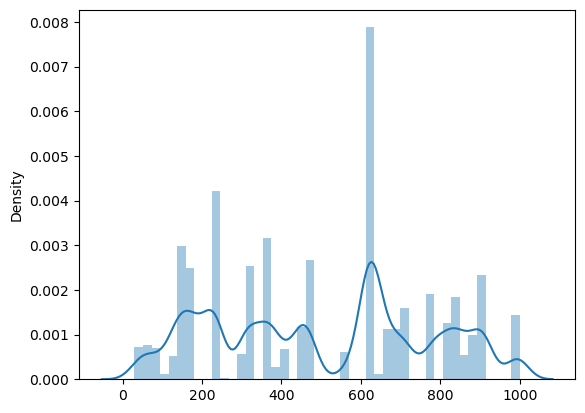

In [13]:
sns.distplot(x=train['views'])

In [14]:
#x,y=train.views.quantile()

<Axes: >

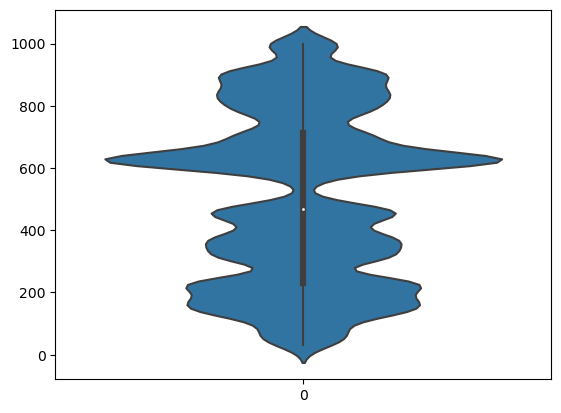

In [15]:
sns.violinplot(train['views'])

In [16]:
train['views'].skew()

0.043661712908474044

In [17]:
q1=train['views'].quantile(0.25)
q2=train['views'].quantile(0.75)

In [18]:
iqr=q2-q1

In [19]:
uplimit=q2+iqr*1.5
lowlimit=q1-iqr*1.5

In [20]:
train[train['views']>uplimit]

,user_id,category_id,video_id,age,followers,views,engagement_score,Gender,Profession


In [21]:
#No outliers found

In [22]:
scaler=MinMaxScaler()
train[[ 'views','followers','age','engagement_score']] =scaler.fit_transform(train[[  'views','followers','age','engagement_score']])
train.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,Gender,Profession
0,19990,37,128,0.241379,0.10,1.000000,0.866,True,1
1,5304,32,132,0.068966,0.85,0.705155,0.358,False,1
2,1840,12,24,0.155172,0.10,0.111340,0.870,True,1
3,12597,23,112,0.155172,0.30,0.601031,0.754,True,1
4,13626,23,112,0.293103,0.30,0.601031,0.626,True,2


In [23]:
x=train.drop(columns=['engagement_score'])
y=train['engagement_score']
x.head()
#y.head()

,user_id,category_id,video_id,age,followers,views,Gender,Profession
0,19990,37,128,0.241379,0.10,1.000000,True,1
1,5304,32,132,0.068966,0.85,0.705155,False,1
2,1840,12,24,0.155172,0.10,0.111340,True,1
3,12597,23,112,0.155172,0.30,0.601031,True,1
4,13626,23,112,0.293103,0.30,0.601031,True,2


In [24]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101,stratify=y)

In [25]:
test=pd.read_csv("C:\\Users\\kowsi\\Downloads\\Hackathon\\test.csv")

In [26]:
test1=pd.read_csv("C:\\Users\\kowsi\\Downloads\\Hackathon\\test.csv")

In [27]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [28]:
test.shape

(11121, 9)

In [29]:
test["Gender"]=pd.get_dummies(test["gender"],drop_first=True)

LE=LabelEncoder()
LE.fit(test["profession"])
test["Profession"]=LE.transform(test["profession"])

test.head() # show the data

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,Gender,Profession
0,89198,7986,12,42,14,Male,Student,180,138,True,1
1,89199,11278,34,115,14,Male,Student,230,840,True,1
2,89200,17245,8,110,44,Female,Working Professional,280,628,False,2
3,89201,9851,16,137,18,Male,Student,270,462,True,1
4,89202,16008,34,96,47,Female,Other,230,840,False,0


In [30]:
test.drop(columns=["gender","profession","row_id"],inplace=True)

In [31]:
test.head()

,user_id,category_id,video_id,age,followers,views,Gender,Profession
0,7986,12,42,14,180,138,True,1
1,11278,34,115,14,230,840,True,1
2,17245,8,110,44,280,628,False,2
3,9851,16,137,18,270,462,True,1
4,16008,34,96,47,230,840,False,0


In [32]:
test.shape

(11121, 8)

In [33]:
test.describe()


,user_id,category_id,video_id,age,followers,views,Profession
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986,0.893625
std,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038,0.698351
min,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000,0.000000
25%,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000,0.000000
50%,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000,1.000000
75%,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000,1.000000
max,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000,2.000000


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
test[[ 'views','followers','age']] =scaler.fit_transform(test[[  'views', 'followers','age']])
test.head()

,user_id,category_id,video_id,age,followers,views,Gender,Profession
0,7986,12,42,0.068966,0.10,0.099366,True,1
1,11278,34,115,0.068966,0.35,0.841438,True,1
2,17245,8,110,0.586207,0.60,0.617336,False,2
3,9851,16,137,0.137931,0.55,0.441860,True,1
4,16008,34,96,0.637931,0.35,0.841438,False,0


# XGBoost

In [37]:
xgb=XGBRegressor(random_state=96,max_depth=8)
xgb.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=96, ...)

In [38]:
train_pred=xgb.predict(train_x)
train_score=r2_score(train_y,train_pred)
train_score

0.587927673489255

In [39]:
valid_pred=xgb.predict(valid_x)
valid_score=r2_score(valid_y,valid_pred)
valid_score

0.36847010364225996

In [40]:
y_pred=xgb.predict(test)

In [41]:
params={
    "learning_rate"    :[0.05,0.1,.15,.2,.25,.3],
    'max_depth'        :[3,4,5,6,7,8,12,15,20,30,40],
    'min_child_weight' :[1,3,5,7],
    "n_estimators"     :[20,30,40,50,60,70,80,90,100,110,120]
}

In [42]:
model1=XGBRegressor()

In [43]:
random_cv=RandomizedSearchCV(model1,param_distributions=params,n_iter=10,scoring='r2',cv=5)

In [44]:
random_cv.fit(train_x, train_y)
print(random_cv.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [45]:
random_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
random_cv.best_params_

{'n_estimators': 60,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.2}

In [47]:
model=XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [48]:
model1=XGBRegressor(n_estimators=100,max_depth=7,min_child_weight=5)
model1.fit(train_x,train_y)
y1=model1.predict(valid_x)
pred1=model1.predict(test)
r2_score(valid_y,y1)

0.36904672203454003

In [49]:
model.fit(train_x,train_y)

C:\Users\kowsi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
C:\Users\kowsi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=None, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=50, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', multi_strategy=None, n_estimators=60,
             n_jobs=0, num_parallel_tree=1, ...)

In [50]:
train_y_pred = model.predict(train_x)
valid_y_pred = model.predict(valid_x)
r2_score(train_y, train_y_pred), r2_score(valid_y, valid_y_pred)

(0.651466256766398, 0.29942295275397024)

In [51]:
predict_y=(model.predict(test))*5

# Gradient Boost

In [67]:
 from sklearn.ensemble import GradientBoostingRegressor
modelgb=GradientBoostingRegressor(random_state=96, n_estimators=400,max_depth=10)
modelgb.fit(train_x,train_y)
y_traingb=modelgb.predict(valid_x)
predgb=modelgb.predict(test)
r2_score(valid_y,y_traingb)

0.4070153301595494

In [68]:
 from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor(random_state=96, n_estimators=400)
model2.fit(train_x,train_y)
y_trainp2=model2.predict(valid_x)
pred2=model2.predict(test)
r2_score(valid_y,y_trainp2)

0.3578213145414548

# RandomForest

In [69]:
model3 = RandomForestRegressor(random_state=96)
model3.fit(train_x,train_y)
y_trainp3=model3.predict(valid_x)
pred3=model3.predict(test)
r2_score(valid_y,y_trainp3)

0.36449378155121603

# Unweighted Average 

In [57]:
from statistics import mean
final_pred1 = np.array([])
for i in range(0,len(test)):
    final_pred1 = np.append(final_pred1, mean([float(pred1[i]), float(pred2[i]), float(pred3[i])]))

In [84]:
final_pred1

array([0.80966759, 0.68500714, 0.56999388, ..., 0.72515775, 0.77514093,
       0.62018875])

# Ranked average

In [71]:
m1_score= xgb.score(train_x,train_y)
m2_score= modelgb.score(train_x,train_y)
m3_score= model3.score(train_x,train_y)
m1_score, m2_score, m3_score

(0.587927673489255, 0.7717542076740314, 0.9099260102216001)

In [72]:
index_ = [1,2,3]
valid_r2 = [m1_score,m2_score,m3_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.587928
2,0.771754
3,0.909926


In [73]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank

,score,rank
1,0.587928,1
2,0.771754,2
3,0.909926,3


In [74]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
1,0.587928,1,0.166667
2,0.771754,2,0.333333
3,0.909926,3,0.500000


In [77]:
wt_pred1 = pred1*float(sorted_rank.loc[[1],['weight']].values)
wt_pred2 = pred2*float(sorted_rank.loc[[2],['weight']].values)
wt_pred3 = pred3*float(sorted_rank.loc[[3],['weight']].values)
ranked_pred= wt_pred1 + wt_pred2 + wt_pred3
ranked_pred

array([0.815105  , 0.69324916, 0.56020753, ..., 0.7136466 , 0.77690275,
       0.62751824])

# DecisionTree

In [64]:
model5 = DecisionTreeRegressor(random_state=96)
model5.fit(train_x,train_y)
train_pred5=model5.predict(valid_x)
pred5=model5.predict(test)
r2_score(valid_y,train_pred5)

-0.13526429586031252

In [65]:
pred5

array([0.828, 0.732, 0.48 , ..., 0.56 , 0.794, 0.638])

# Submssion File

In [89]:
sub=pd.DataFrame(predgb*5,columns=['engagement_score'])

In [90]:
sub['row_id']=test1['row_id']

In [91]:
sub.shape

(11121, 2)

In [92]:
sub.head()

,engagement_score,row_id
0,4.090152,89198
1,3.567526,89199
2,2.622328,89200
3,3.794933,89201
4,1.719767,89202


In [93]:
sub.to_csv('C:\\Users\\kowsi\\Downloads\\Hackathon\\submission_file.csv',index=False)